In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [ ]:
transaction = pd.read_csv('/content/drive/MyDrive/Venezuela DS Team/transaction_venezuela.csv')
clickstream = pd.read_csv('/content/drive/MyDrive/Venezuela DS Team/clickstream_venezuela.csv')
customer = pd.read_csv('/content/drive/MyDrive/Venezuela DS Team/customer_venezuela.csv')

In [ ]:
customer.head()

,Unnamed: 0,customer_id,gender,device_type,age,lengthjoin_months,homelocation_category,cust_age_category,membership
0,0,2870,0,1,26,40,1,1,0
1,1,8193,0,0,29,65,0,1,0
2,2,7279,1,1,33,27,1,0,1
3,3,88813,1,1,31,13,1,0,2
4,4,82542,1,1,22,19,0,2,2


In [ ]:
transaction = transaction.drop(columns = 'Unnamed: 0')
clickstream = clickstream.drop(columns = 'Unnamed: 0')
customer = customer.drop(columns = 'Unnamed: 0')

In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 21 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   index                   1254585 non-null  int64  
 1   created_at              1254585 non-null  object 
 2   customer_id             1254585 non-null  int64  
 3   session_id              1254585 non-null  object 
 4   payment_method          1254585 non-null  int64  
 5   payment_status          1254585 non-null  int64  
 6   promo_amount            1254585 non-null  int64  
 7   promo_code              1254585 non-null  int64  
 8   shipment_fee            1254585 non-null  int64  
 9   shipment_date_limit     1254585 non-null  object 
 10  total_amount            1254585 non-null  int64  
 11  product_id              1254585 non-null  int64  
 12  quantity                1254585 non-null  int64  
 13  item_price              1254585 non-null  int64  
 14  ge

In [ ]:
transaction = transaction.groupby(['session_id', 'customer_id']).agg({'created_at':'first',
                                                                      'estimated_days_arrival':'first',
                                                                      'payment_method':'first',
                                                                      'payment_status':'first',
                                                                      'promo_amount':'first',
                                                                      'shipment_fee':'first',
                                                                      'shipment_date_limit':'first',
                                                                      'total_amount':'first',
                                                                      'product_id':'count',
                                                                      'quantity':'sum',
                                                                      'item_price':'mean',
                                                                      'gender':pd.Series.nunique,
                                                                      'master_category':pd.Series.nunique,
                                                                      'season':pd.Series.nunique,
                                                                      'product_name_length':'mean',
                                                                      })

In [ ]:
transaction = transaction.reset_index()

In [ ]:
transaction.isna().sum()

session_id                   0
customer_id                  0
created_at                   0
estimated_days_arrival       0
payment_method               0
payment_status               0
promo_amount                 0
shipment_fee                 0
shipment_date_limit          0
total_amount                 0
product_id                   0
quantity                     0
item_price                   0
gender                       0
master_category              0
season                       0
product_name_length       5815
dtype: int64

In [ ]:
df = pd.merge(transaction, clickstream, how = 'inner', on = 'session_id')
df = pd.merge(df, customer, how = 'left', on = 'customer_id')

In [ ]:
df = df.rename(columns = {'gender_y':'gender_customer', 'gender_x':'gender_product'})

In [ ]:
df = df.dropna()

In [ ]:
df = df.rename(columns = {'payment_status_x':'payment_status'})

In [ ]:
df = df.drop(columns = ['payment_status_y', 'is_not_purchase', 'is_purchase', 'is_purchase_failed'])

In [ ]:
df = df.drop(index = df[df['session_length'] == 0].index)

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846523 entries, 0 to 852581
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   session_id              846523 non-null  object             
 1   customer_id             846523 non-null  int64              
 2   created_at              846523 non-null  datetime64[ns, UTC]
 3   estimated_days_arrival  846523 non-null  int64              
 4   payment_method          846523 non-null  int64              
 5   payment_status          846523 non-null  int64              
 6   promo_amount            846523 non-null  int64              
 7   shipment_fee            846523 non-null  int64              
 8   shipment_date_limit     846523 non-null  object             
 9   total_amount            846523 non-null  int64              
 10  product_id              846523 non-null  int64              
 11  quantity                84

In [ ]:
df.head()

,session_id,customer_id,created_at,estimated_days_arrival,payment_method,payment_status,promo_amount,shipment_fee,shipment_date_limit,total_amount,...,search_keywords_count,session_length,is_search,gender_customer,device_type,age,lengthjoin_months,homelocation_category,cust_age_category,membership
0,00001f29-3ede-4445-95f0-0178934e32ba,74433,2019-05-19 20:17:04.276396+00:00,1,0,1,0,0,2019-05-21 13:04:58.898492+00:00,1427802,...,0.0,58528,0,0,0,26,70,0,1,0
1,00003eca-954b-4150-aee1-63fc62f395cf,43805,2019-08-24 06:26:12.662344+00:00,5,3,1,0,0,2019-08-29 17:32:03.784460+00:00,339790,...,0.0,742,0,0,0,39,39,0,0,0
3,00005746-17ec-449c-9c5c-699a3ea9304a,25255,2022-03-08 23:21:35.510057+00:00,4,2,1,0,0,2022-03-13 17:18:32.359411+00:00,1231854,...,11.0,255,1,1,0,20,29,0,3,1
4,0000649b-9514-4600-979b-42166a798996,16868,2020-07-23 14:31:15.525079+00:00,4,4,1,10288,10000,2020-07-27 15:19:38.948974+00:00,70859,...,1.0,84396,1,1,0,25,40,0,2,0
5,00007415-e0e7-4a33-95e8-5bc749016876,78259,2022-07-24 13:16:40.038087+00:00,2,0,1,0,0,2022-07-27 11:35:25.298016+00:00,195528,...,9.0,256,1,0,0,22,3,0,2,3


In [ ]:
df_trial = df[df['payment_status'] == 1]

In [ ]:
df_trial = df_trial[['created_at', 'customer_id']]

In [ ]:
df_trial['month'] = df_trial['created_at'].apply(lambda x: x.strftime("%Y-%m"))
df_trial['first_order'] = df_trial.groupby('customer_id')['created_at'].transform('min')
df_trial['first_month'] = df_trial['first_order'].apply(lambda x: x.strftime("%Y-%m"))

In [ ]:
df_trial_a = df_trial[(df_trial['month'] <= '2022-01') &
                      (df_trial['month'] > '2019-12') &
                      (df_trial['first_month'] <= '2022-01') &
                      (df_trial['first_month'] > '2019-12')]

In [ ]:
df_trial_a['last_order'] = df_trial_a.groupby('customer_id')['created_at'].transform('max')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_trial_a['customer_id'].nunique()

21033

In [ ]:
df_trial_a.sort_values('month', ascending = True)

,created_at,customer_id,month,first_order,first_month,last_order
795818,2020-01-30 01:57:06.462966+00:00,48514,2020-01,2020-01-30 01:57:06.462966+00:00,2020-01,2022-01-31 12:16:30.462966+00:00
183548,2020-01-27 22:08:33.760446+00:00,17703,2020-01,2020-01-27 22:08:33.760446+00:00,2020-01,2020-01-27 22:08:33.760446+00:00
516098,2020-01-24 22:57:55.836117+00:00,39367,2020-01,2020-01-04 23:46:12.836117+00:00,2020-01,2022-01-13 21:48:07.836117+00:00
217428,2020-01-04 08:24:36.193865+00:00,30949,2020-01,2020-01-04 08:24:36.193865+00:00,2020-01,2021-12-09 22:26:24.193865+00:00
436697,2020-01-06 05:19:06.273740+00:00,34683,2020-01,2020-01-06 05:19:06.273740+00:00,2020-01,2022-01-27 15:46:40.273740+00:00
...,...,...,...,...,...,...
630685,2022-01-09 12:43:55.446273+00:00,22160,2022-01,2021-08-02 12:36:36.446273+00:00,2021-08,2022-01-29 12:55:46.446273+00:00
251163,2022-01-19 23:04:28.011204+00:00,25347,2022-01,2021-01-06 12:39:00.011204+00:00,2021-01,2022-01-19 23:04:28.011204+00:00
316813,2022-01-14 00:53:46.656304+00:00,77592,2022-01,2021-06-27 22:53:46.656304+00:00,2021-06,2022-01-14 00:53:46.656304+00:00
631063,2022-01-03 17:59:03.002038+00:00,91812,2022-01,2020-06-22 01:14:39.002038+00:00,2020-06,2022-01-19 18:15:48.002038+00:00


In [ ]:
a = df_trial_a.pivot_table(index = "first_month",
                 columns = "month",
                 values = "customer_id",
                 aggfunc = pd.Series.nunique,
                 fill_value = 0)

In [ ]:
a

month,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,...,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01
first_month,,,,,,,,,,,,,,,,,,,,,
2020-01,638,127,179,172,207,195,211,202,199,184,...,311,183,179,221,198,252,179,188,216,225
2020-02,0,734,176,231,251,240,265,261,280,254,...,193,415,246,242,286,210,332,233,300,239
2020-03,0,0,697,184,234,248,269,260,246,269,...,238,373,223,258,259,249,303,238,297,235
2020-04,0,0,0,677,178,244,246,260,258,244,...,263,211,377,248,247,262,308,224,255,278
2020-05,0,0,0,0,447,77,109,128,122,115,...,108,126,209,103,126,125,105,156,105,146
2020-06,0,0,0,0,0,660,174,217,252,237,...,264,239,207,345,248,256,219,310,236,246
2020-07,0,0,0,0,0,0,1347,344,454,488,...,432,521,466,729,431,462,523,573,431,563
2020-08,0,0,0,0,0,0,0,1028,285,388,...,485,404,421,353,559,391,426,369,474,404
2020-09,0,0,0,0,0,0,0,0,808,212,...,318,327,298,294,419,260,291,292,356,279


In [ ]:
np.array(pd.DataFrame(df_trial['month'].unique()).sort_values(0, ascending = True).iloc[7:19])

array([['2017-01'],
       ['2017-02'],
       ['2017-03'],
       ['2017-04'],
       ['2017-05'],
       ['2017-06'],
       ['2017-07'],
       ['2017-08'],
       ['2017-09'],
       ['2017-10'],
       ['2017-11'],
       ['2017-12']], dtype=object)

In [ ]:
data2017 = np.array(pd.DataFrame(df_trial['month'].unique()).sort_values(0, ascending = True).reset_index()[0].iloc[7:19])
data2018 = np.array(pd.DataFrame(df_trial['month'].unique()).sort_values(0, ascending = True).reset_index()[0].iloc[19:31])
data2019 = np.array(pd.DataFrame(df_trial['month'].unique()).sort_values(0, ascending = True).reset_index()[0].iloc[31:43])
data2020 = np.array(pd.DataFrame(df_trial['month'].unique()).sort_values(0, ascending = True).reset_index()[0].iloc[33:45])
data2021 = np.array(pd.DataFrame(df_trial['month'].unique()).sort_values(0, ascending = True).reset_index()[0].iloc[45:57])
data2022 = np.array(pd.DataFrame(df_trial['month'].unique()).sort_values(0, ascending = True).reset_index()[0].iloc[57:])

In [ ]:
def segmentation(array_month):
  temp_array = []
  for i in range(len(array_month)):
    temp = df_trial[df_trial['month'] == array_month[i]]
    temp_array.append(temp)
  return temp_array

In [ ]:
tahun2017 = segmentation(data2021)

In [ ]:
tahun2017[0]

,created_at,customer_id,month,first_order,first_month
6,2020-03-17 08:36:24.395556+00:00,31159,2020-03,2018-08-15 05:24:21.395556+00:00,2018-08
66,2020-03-03 23:18:30.625797+00:00,28441,2020-03,2017-05-13 20:18:11.625797+00:00,2017-05
124,2020-03-22 09:03:00.982387+00:00,33025,2020-03,2020-03-22 09:03:00.982387+00:00,2020-03
134,2020-03-18 10:02:59.065284+00:00,76304,2020-03,2019-05-15 10:14:19.065284+00:00,2019-05
199,2020-03-05 22:15:10.641407+00:00,51778,2020-03,2018-09-30 20:44:12.641407+00:00,2018-09
...,...,...,...,...,...
852413,2020-03-06 09:47:09.660888+00:00,44024,2020-03,2019-06-24 03:32:04.660888+00:00,2019-06
852440,2020-03-30 20:46:22.451209+00:00,6311,2020-03,2017-10-09 18:25:31.451209+00:00,2017-10
852469,2020-03-07 02:10:19.365024+00:00,57621,2020-03,2018-04-13 21:46:35.365024+00:00,2018-04
852518,2020-03-30 01:00:12.821267+00:00,37247,2020-03,2018-06-03 23:45:27.821267+00:00,2018-06


In [ ]:
tahun2021 = segmentation(data2022)

In [ ]:
u = pd.concat(tahun2021[:6])

In [ ]:
u

,created_at,customer_id,month,first_order,first_month
7,2021-03-10 13:15:34.110664+00:00,1681,2021-03,2020-03-23 11:04:37.110664+00:00,2020-03
32,2021-03-22 20:24:28.785820+00:00,47641,2021-03,2017-02-26 05:11:08.785820+00:00,2017-02
63,2021-03-20 00:42:38.316417+00:00,19116,2021-03,2019-07-28 21:09:30.316417+00:00,2019-07
88,2021-03-31 00:29:31.036379+00:00,49907,2021-03,2020-02-16 14:18:22.036379+00:00,2020-02
107,2021-03-16 20:42:14.276669+00:00,6663,2021-03,2019-05-06 09:47:06.276669+00:00,2019-05
...,...,...,...,...,...
852232,2021-08-19 20:46:59.551234+00:00,67150,2021-08,2017-10-13 13:49:52.551234+00:00,2017-10
852268,2021-08-28 20:25:50.658925+00:00,93012,2021-08,2020-09-02 09:52:03.658925+00:00,2020-09
852296,2021-08-05 07:27:24.553224+00:00,74072,2021-08,2019-10-15 02:02:25.553224+00:00,2019-10
852395,2021-08-31 13:42:56.019908+00:00,67299,2021-08,2017-07-19 10:34:33.019908+00:00,2017-07


In [ ]:
df_final = df.groupby('customer_id').agg({'created_at':'first',
                                'estimated_days_arrival':'mean','payment_method':'first', 'payment_status':'first', 'promo_amount':'mean', 'shipment_fee':'mean',
                                'total_amount':'mean', 'product_id':'count', 'quantity':'sum', 'item_price':'mean', 'gender_product':pd.Series.nunique,
                                'master_category':pd.Series.nunique, 'season':pd.Series.nunique, 'product_name_length':'mean', 'event_id':'mean', 'search_keywords_count':'sum'})

In [ ]:
df_final = pd.merge(df_final, customer, how = 'left', on = 'customer_id')

In [ ]:
df_final_customer = df_final.reset_index()

#disini mulainya

In [ ]:
#untuk di dashboard
a = df_trial_a.pivot_table(index = "first_month",
                 columns = "month",
                 values = "customer_id",
                 aggfunc = pd.Series.nunique,
                 fill_value = 0)

In [ ]:
data2020 = np.array(pd.DataFrame(df_trial['month'].unique()).sort_values(0, ascending = True).reset_index()[0].iloc[43:55])
data2021 = np.array(pd.DataFrame(df_trial['month'].unique()).sort_values(0, ascending = True).reset_index()[0].iloc[55:67])

In [ ]:
tahun2020 = segmentation(data2020)
tahun2021 = segmentation(data2021)

In [ ]:
tahun2021a = pd.concat(tahun2021[:2]).groupby(['customer_id', 'month']).count().reset_index()
tahun2021b = pd.concat(tahun2021[3:5]).groupby(['customer_id', 'month']).count().reset_index()

tahun2021c = pd.concat(tahun2021[6:8]).groupby(['customer_id', 'month']).count().reset_index()
tahun2021d = pd.concat(tahun2021[9:11]).groupby(['customer_id', 'month']).count().reset_index()

In [ ]:
tahun2020a = pd.concat(tahun2020[:2]).groupby(['customer_id', 'month']).count().reset_index()
tahun2020b = pd.concat(tahun2020[3:5]).groupby(['customer_id', 'month']).count().reset_index()

tahun2020c = pd.concat(tahun2020[6:8]).groupby(['customer_id', 'month']).count().reset_index()
tahun2020d = pd.concat(tahun2020[9:11]).groupby(['customer_id', 'month']).count().reset_index()

In [ ]:
final2020 = pd.merge(tahun2020a, tahun2020b, on = 'customer_id', how = 'outer')
final2020.fillna(0, inplace=True)

final2020.loc[(final2020['created_at_x'] > 0) & (final2020['created_at_y'] > 0), 'customer_segment'] = 'not_churn'
final2020.loc[(final2020['created_at_x'] > 0) & (final2020['created_at_y'] == 0), 'customer_segment'] = 'churn'
final2020.loc[(final2020['created_at_x'] == 0) & (final2020['created_at_y'] > 0), 'customer_segment'] = 'new_cust'
final2020.loc[(final2020['created_at_x'] == 0) & (final2020['created_at_y'] == 0), 'customer_segment'] = 'passive'

In [ ]:
final2020a = pd.merge(tahun2020c, tahun2020d, on = 'customer_id', how = 'outer')
final2020a.fillna(0, inplace=True)

final2020a.loc[(final2020a['created_at_x'] > 0) & (final2020a['created_at_y'] == 0), 'customer_segment'] = 'churn'
final2020a.loc[(final2020a['created_at_x'] > 0) & (final2020a['created_at_y'] > 0), 'customer_segment'] = 'not_churn'
final2020a.loc[(final2020a['created_at_x'] == 0) & (final2020a['created_at_y'] > 0), 'customer_segment'] = 'new_cust'
final2020a.loc[(final2020a['created_at_x'] == 0) & (final2020a['created_at_y'] == 0), 'customer_segment'] = 'passive'

In [ ]:
final2021 = pd.merge(tahun2021a, tahun2021b, on = 'customer_id', how = 'outer')
final2021.fillna(0, inplace=True)

final2021.loc[(final2021['created_at_x'] > 0) & (final2021['created_at_y'] > 0), 'customer_segment'] = 'not_churn'
final2021.loc[(final2021['created_at_x'] > 0) & (final2021['created_at_y'] == 0), 'customer_segment'] = 'churn'
final2021.loc[(final2021['created_at_x'] == 0) & (final2021['created_at_y'] > 0), 'customer_segment'] = 'new_cust'
final2021.loc[(final2021['created_at_x'] == 0) & (final2021['created_at_y'] == 0), 'customer_segment'] = 'passive'

In [ ]:
final2021a = pd.merge(tahun2021c, tahun2021d, on = 'customer_id', how = 'outer')
final2021a.fillna(0, inplace=True)

final2021a.loc[(final2021a['created_at_x'] > 0) & (final2021a['created_at_y'] > 0), 'customer_segment'] = 'not_churn'
final2021a.loc[(final2021a['created_at_x'] > 0) & (final2021a['created_at_y'] == 0), 'customer_segment'] = 'churn'
final2021a.loc[(final2021a['created_at_x'] == 0) & (final2021a['created_at_y'] > 0), 'customer_segment'] = 'new_cust'
final2021a.loc[(final2021a['created_at_x'] == 0) & (final2021a['created_at_y'] == 0), 'customer_segment'] = 'passive'

In [ ]:
final2020a['customer_segment'].value_counts()

not_churn    27731
new_cust      5405
churn         4276
Name: customer_segment, dtype: int64

In [ ]:
data_2020 = pd.concat([final2020, final2020a])

In [ ]:
data_2021 = pd.concat([final2021, final2021a])

In [ ]:
data_ml = pd.concat([data_2020, data_2021])

In [ ]:
data_ml = data_ml.groupby('customer_id').first()

In [ ]:
data_ml['customer_segment'].value_counts()

not_churn    14272
new_cust     12585
churn         9632
Name: customer_segment, dtype: int64

In [ ]:
data_ml = pd.merge(data_ml, df_final_customer, how = 'left', on = 'customer_id')

In [ ]:
data_ml.head()

,customer_id,month_x,created_at_x,first_order_x,first_month_x,month_y,created_at_y,first_order_y,first_month_y,customer_segment,...,product_name_length,event_id,search_keywords_count,gender,device_type,age,lengthjoin_months,homelocation_category,cust_age_category,membership
0,3,2020-01,1.0,1.0,1.0,2020-04,1.0,1.0,1.0,not_churn,...,36.173203,13.372549,51.0,1,0,36,51,0,0,0
1,8,2021-02,1.0,1.0,1.0,2021-04,1.0,1.0,1.0,not_churn,...,34.642857,28.857143,9.0,0,0,22,21,1,2,2
2,9,0,0.0,0.0,0.0,2021-11,1.0,1.0,1.0,new_cust,...,34.250000,9.833333,4.0,0,0,16,17,0,3,2
3,15,0,0.0,0.0,0.0,2020-04,1.0,1.0,1.0,new_cust,...,35.720000,11.400000,3.0,0,0,39,38,0,0,0
4,18,2020-01,1.0,1.0,1.0,2020-04,1.0,1.0,1.0,not_churn,...,34.964286,15.928571,54.0,0,0,27,44,0,1,0


In [ ]:
data_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36489 entries, 0 to 36488
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   customer_id             36489 non-null  int64              
 1   month_x                 36489 non-null  object             
 2   created_at_x            36489 non-null  float64            
 3   first_order_x           36489 non-null  float64            
 4   first_month_x           36489 non-null  float64            
 5   month_y                 36489 non-null  object             
 6   created_at_y            36489 non-null  float64            
 7   first_order_y           36489 non-null  float64            
 8   first_month_y           36489 non-null  float64            
 9   customer_segment        36489 non-null  object             
 10  index                   36489 non-null  int64              
 11  created_at              36489 non-null  d

In [ ]:
ml_ready = data_ml[(data_ml['customer_segment'] == 'churn') | (data_ml['customer_segment'] == 'not_churn')]

In [ ]:
ml_ready = ml_ready.drop(columns = ['customer_id', 'month_x', 'created_at_x', 'first_month_x', 'first_order_x', 'month_y', 'created_at_y', 'first_order_y', 'first_month_y',
                                    'index'])

In [ ]:
ml_ready = ml_ready.drop(columns = 'created_at')

In [ ]:
ml_ready.head()

,customer_segment,estimated_days_arrival,payment_method,payment_status,promo_amount,shipment_fee,total_amount,product_id,quantity,item_price,...,product_name_length,event_id,search_keywords_count,gender,device_type,age,lengthjoin_months,homelocation_category,cust_age_category,membership
0,not_churn,3.058824,0,1,2570.235294,7156.862745,416978.215686,51,88,241362.797386,...,36.173203,13.372549,51.0,1,0,36,51,0,0,0
1,not_churn,2.857143,0,1,1099.857143,6428.571429,556937.285714,7,19,247604.500000,...,34.642857,28.857143,9.0,0,0,22,21,1,2,2
4,not_churn,3.071429,1,1,2809.857143,9821.428571,419977.142857,28,47,245597.244898,...,34.964286,15.928571,54.0,0,0,27,44,0,1,0
6,churn,3.000000,2,1,0.000000,0.000000,372441.000000,1,1,372441.000000,...,30.000000,8.000000,0.0,1,0,28,15,0,1,2
7,not_churn,2.866667,2,1,2877.066667,10666.666667,544023.533333,15,33,221975.711111,...,33.055556,11.066667,16.0,1,0,67,28,0,0,1


In [ ]:
ml_ready['customer_segment'].replace(to_replace='churn', value=1, inplace=True)
ml_ready['customer_segment'].replace(to_replace='not_churn', value=0, inplace=True)
ml_ready = ml_ready.rename(columns = {'customer_segment':'churn'})

In [ ]:
ml_ready = ml_ready.reset_index()
ml_ready = ml_ready.drop(columns = 'index')

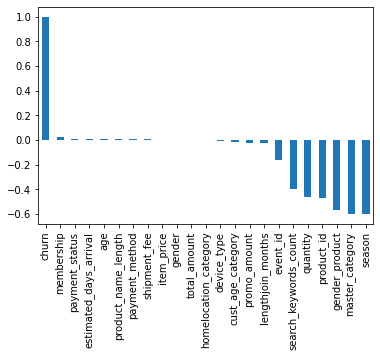

In [ ]:
ml_ready.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, fbeta_score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
y = ml_ready['churn'].values
X = ml_ready.drop(['churn'], axis = 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.score(X_test,y_test)

0.7883288015059611

In [ ]:
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

In [ ]:
results = pd.DataFrame([[
'KNN', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
print (results)

  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   KNN  0.788329   0.790343  0.645898  0.710857  0.670403


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import auc, roc_auc_score, roc_curve

In [ ]:
# Fitting Decision Tree to the Training set:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

In [ ]:
model_results = pd.DataFrame([[
'Decision Tree', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])

In [ ]:
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision",
"Recall", "F2 Score"], ascending = False)
print (results)

           Model  Accuracy  Precision    Recall  F1 Score  F2 Score
1  Decision Tree  0.923029   0.902376  0.907061  0.904713  0.906120
0            KNN  0.788329   0.790343  0.645898  0.710857  0.670403


Text(0.5, 15.0, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

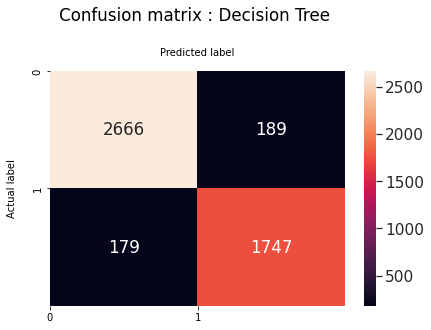

In [ ]:
#Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu"
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix : Decision Tree \n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

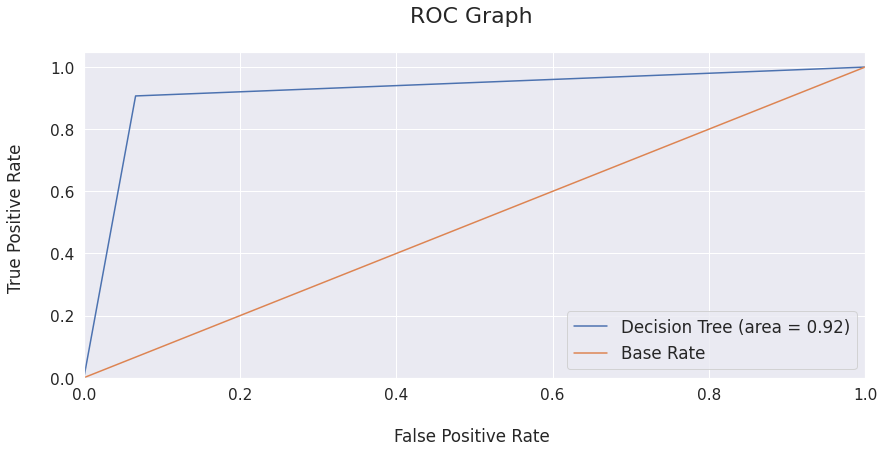

In [ ]:
#ROC Curve

classifier.fit(X_train, y_train)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
classifier_roc_auc = accuracy_score(y_test, y_pred )
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))
# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr,
label='Decision Tree (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium",
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium",
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "22",
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Fitting Random Forest to the Training set:

classifier = RandomForestClassifier(n_estimators = 72,
criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=72, random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
#Evaluate results
accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Random Forest',
acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision",
"Recall", "F2 Score"], ascending = False)
print (results)

           Model  Accuracy  Precision    Recall  F1 Score  F2 Score
2  Random Forest  0.939134   0.961083  0.884735  0.921330  0.899019
0  Decision Tree  0.923029   0.902376  0.907061  0.904713  0.906120
1            KNN  0.788329   0.790343  0.645898  0.710857  0.670403


Text(0.5, 7.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

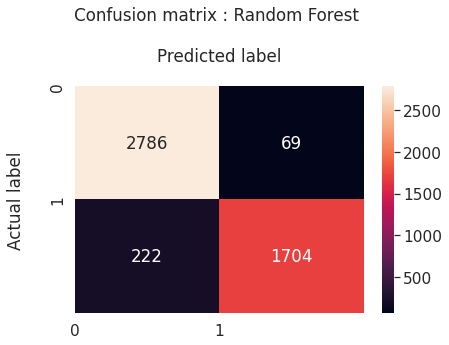

In [ ]:
#Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu"
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix : Random Forest \n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

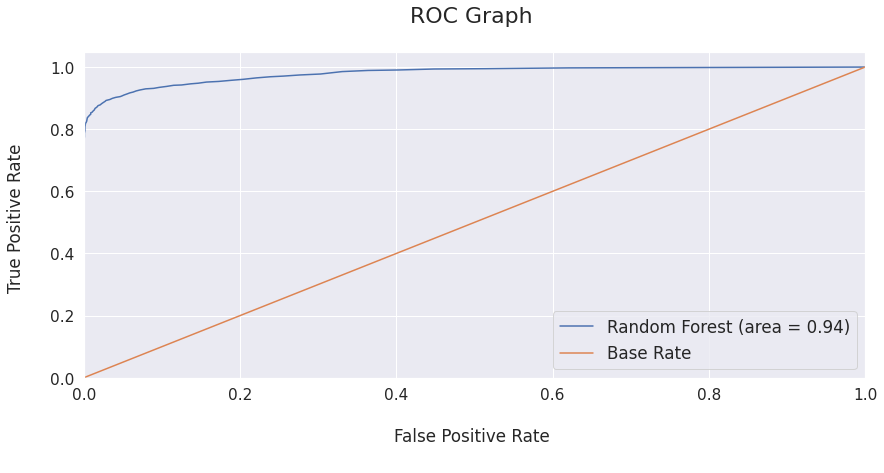

In [ ]:
#ROC Curve

classifier.fit(X_train, y_train)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
classifier_roc_auc = accuracy_score(y_test, y_pred )
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))
# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr,
label='Random Forest (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium",
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium",
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "22",
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier = SVC(random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
#Evaluate results
accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['SVM',
acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision",
"Recall", "F2 Score"], ascending = False)
print (results)

           Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Random Forest  0.939134   0.961083  0.884735  0.921330  0.899019
1  Decision Tree  0.923029   0.902376  0.907061  0.904713  0.906120
2            SVM  0.890609   0.841031  0.898235  0.868692  0.886180
4            SVM  0.874294   0.837150  0.854102  0.845541  0.850657
3            KNN  0.788329   0.790343  0.645898  0.710857  0.670403


## XGBoost

In [ ]:
# Packages
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
import xgboost as xgb

In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
reg_mod = xgb.XGBRegressor(objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.10,
    subsample=0.5,
    colsample_bytree=1,
    max_depth=5)
reg_mod.fit(X_train, y_train)

XGBRegressor(max_depth=5, n_estimators=1000, objective='reg:squarederror',
             subsample=0.5)

In [ ]:
reg_mod.fit(X_train,y_train)

xgb_predictions = reg_mod.predict(X_test)
print(xgb_predictions)

[0.11288935 0.09718356 0.04228333 ... 0.14806646 0.2129327  0.11931807]


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
print("RMSE: %f" % (rmse))

RMSE: 0.212467


In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
Params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=Params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=100)

[04:37:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:37:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
cv_results.sort_values(by='test-rmse-mean',inplace=True)
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
49,0.223512,0.002422,0.230646,0.006455
48,0.223634,0.002429,0.230707,0.006462
47,0.224847,0.002519,0.231850,0.006346
46,0.226964,0.002029,0.233861,0.006443
45,0.227211,0.002075,0.234043,0.006431


In [ ]:
xg_reg = xgb.train(params=Params, dtrain=data_dmatrix, num_boost_round=10)
print(xg_reg)

[04:37:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


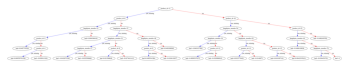

In [ ]:
# Plot Tree
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [80, 30]
plt.show()

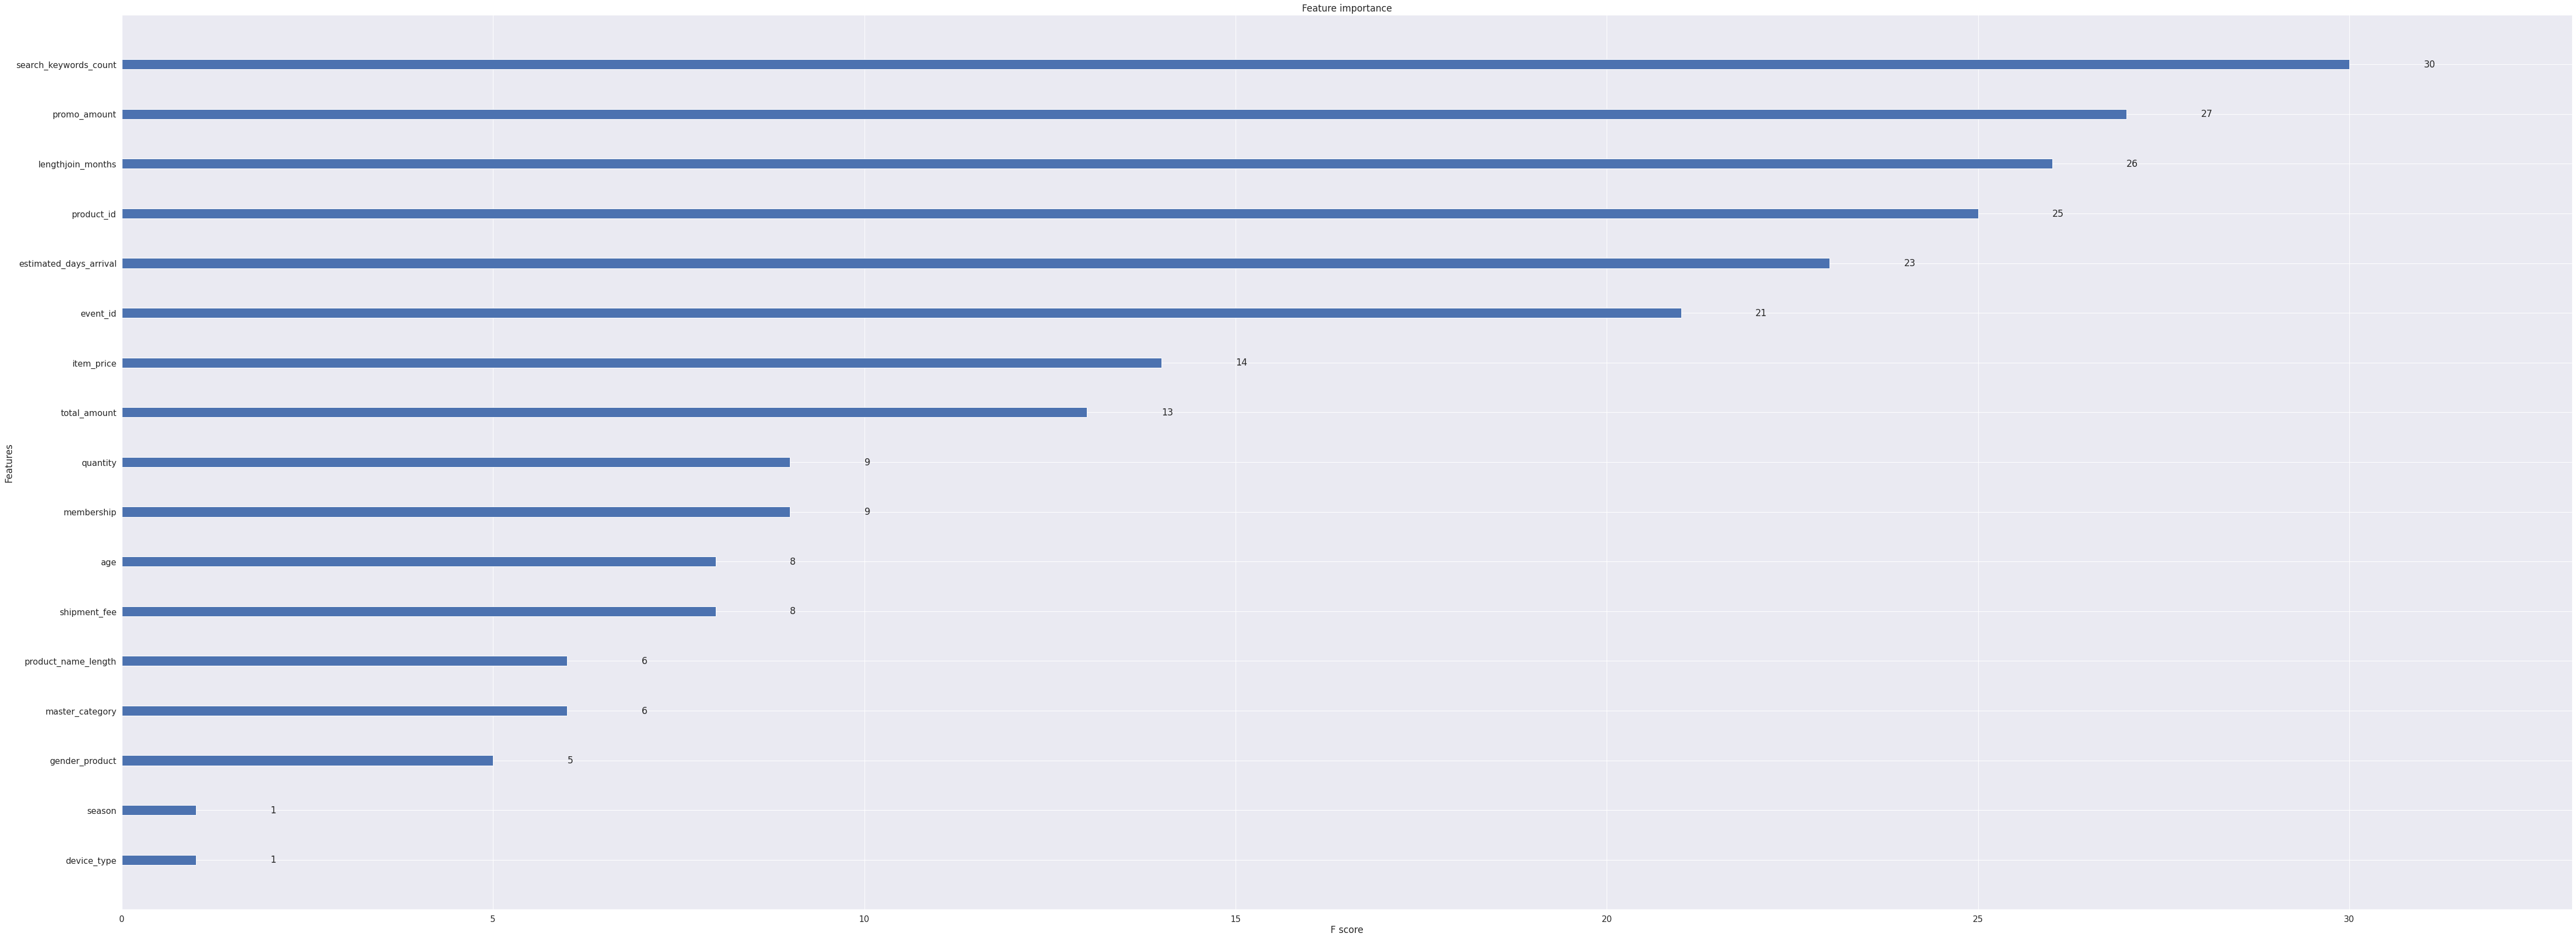

In [ ]:
# Feature Importance
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 8]
plt.show()

In [ ]:
import xgboost
xgboost.XGBClassifier().get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
reg_model = xgb.XGBRegressor(n_estimators=1000,
    learning_rate=0.10,
    subsample=0.5,
    colsample_bytree=1,
    max_depth=5,
    eval_metric='auc',
    verbocity=1)
set_eval = [(X_test,y_test)]
reg_model.fit(X_train, y_train,early_stopping_rounds=10,eval_set=set_eval,verbose=True)

[04:38:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-auc:0.977931
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.979156
[2]	validation_0-auc:0.980423
[3]	validation_0-auc:0.980584
[4]	validation_0-auc:0.980937
[5]	validation_0-auc:0.9811
[6]	validation_0-auc:0.980985
[7]	validation_0-auc:0.981331
[8]	validation_0-auc:0.981596
[9]	validation_0-auc:0.981795
[10]	validation_0-auc:0.981727
[11]	validation_0-auc:0.981958
[12]	validation_0-auc:0.981923
[13]	validation_0-auc:0.98213
[14]	validation_0-auc:0.982403
[15]	validation_0-auc:0.982247
[16]	validation_0-auc:0.982398
[17]	validation_0-auc:0.982468
[18]	validation_0-auc:0.982435
[19]	validation_0-auc:0.982654
[20]	validation_0-auc:0.982594
[21]	validation_0-auc:0.982754
[22]	validation_0-auc:0.982677
[23]	validation_0-auc:0.982556
[24]	validation_0-auc:0.98252
[25]	validation_0-auc:0.982377
[26]	validation_0

XGBRegressor(eval_metric='auc', max_depth=5, n_estimators=1000, subsample=0.5,
             verbocity=1)

In [ ]:
from sklearn.metrics import roc_auc_score
y_train_pred = reg_model.predict(X_train)
y_valid_pred = reg_model.predict(X_test)
print("AUC Train : {:.4f}\nAUC Valid: {:4f}".format(roc_auc_score(y_train,y_train_pred),
                                                    roc_auc_score(y_test,y_valid_pred)))

AUC Train : 0.9868
AUC Valid: 0.982754


In [ ]:
learning_rate_list = [0.02,0.05,0.10]
max_depth_list = [2,3,5]
n_estimators_list = [1000,2000,3000]
params_dict = {"learning_rate": learning_rate_list,
               "max_depth": max_depth_list,
               "n_estimators": n_estimators_list}
num_combination = 1
for a in params_dict.values():num_combination *=len(a)
print(num_combination)
params_dict

27


{'learning_rate': [0.02, 0.05, 0.1],
 'max_depth': [2, 3, 5],
 'n_estimators': [1000, 2000, 3000]}

In [ ]:
def my_roc_auc_score(model,X,y):return roc_auc_score(y,model.predict(X))
my_model = GridSearchCV(estimator=xgboost.XGBClassifier(subsample=0.5,
                                                        colsample_bytree=0.25,
                                                        eval_metric='auc',
                                                        use_label_encoder=False),
                        param_grid=params_dict,
                        cv=2,
                        scoring=my_roc_auc_score,
                        return_train_score=True,
                        verbose=4)
my_model.fit(X,y)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.937, test=0.932) total time=   5.4s
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.936, test=0.933) total time=   5.4s
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.945, test=0.934) total time=  10.7s
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.943, test=0.935) total time=  10.6s
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=3000;, score=(train=0.949, test=0.935) total time=  17.2s
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=3000;, score=(train=0.950, test=0.936) total time=  16.1s
[CV 1/2] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.946, test=0.934) total time=   8.2s
[CV 2/2] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.945, test=0.934) total time=   6.8s
[CV

GridSearchCV(cv=2,
             estimator=XGBClassifier(colsample_bytree=0.25, eval_metric='auc',
                                     subsample=0.5, use_label_encoder=False),
             param_grid={'learning_rate': [0.02, 0.05, 0.1],
                         'max_depth': [2, 3, 5],
                         'n_estimators': [1000, 2000, 3000]},
             return_train_score=True,
             scoring=<function my_roc_auc_score at 0x7ff8832fbdd0>, verbose=4)

In [ ]:
df_cv_results = pd.DataFrame(my_model.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                               'param_learning_rate','param_max_depth','param_n_estimators']]
df_cv_results.sort_values(by='rank_test_score',inplace=True)
df_cv_results.head()

,rank_test_score,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators
7,1,0.936299,0.984526,0.02,5,2000
6,2,0.935874,0.964145,0.02,5,1000
8,3,0.935651,0.995898,0.02,5,3000
15,4,0.935525,0.990826,0.05,5,1000
2,5,0.935318,0.949519,0.02,2,3000


Text(0.5, 1.0, 'Performance')

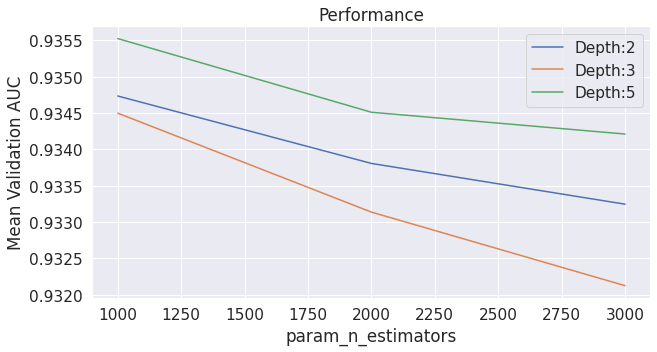

In [ ]:
df_cv_results.sort_values(by='param_n_estimators',inplace=True)
lr_d2 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==2)]
lr_d3 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==3)]
lr_d5 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==5)]

#Plot
fig,ax=plt.subplots(figsize=(10,5))
lr_d2.plot(x='param_n_estimators', y='mean_test_score',label='Depth:2',ax=ax)
lr_d3.plot(x='param_n_estimators', y='mean_test_score',label='Depth:3',ax=ax)
lr_d5.plot(x='param_n_estimators', y='mean_test_score',label='Depth:5',ax=ax)

plt.ylabel('Mean Validation AUC')
plt.title('Performance')

In [ ]:
my_final_model = xgboost.XGBClassifier(learning_rate=0.05,
                                       max_depth=2,
                                       n_estimators=5000,
                                       subsample=0.5,
                                       colsample_bytree=0.25,
                                       eval_metric='auc',
                                       verbosity=1,
                                       use_label_encoder=False)
eval = [(X_train,y_train),(X_test,y_test)]
my_final_model.fit(X_train,y_train,early_stopping_rounds=20,
                   eval_set=eval,verbose=True)


[0]	validation_0-auc:0.840725	validation_1-auc:0.844582
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.90546	validation_1-auc:0.90679
[2]	validation_0-auc:0.924939	validation_1-auc:0.925548
[3]	validation_0-auc:0.927656	validation_1-auc:0.926878
[4]	validation_0-auc:0.928985	validation_1-auc:0.928323
[5]	validation_0-auc:0.927139	validation_1-auc:0.927238
[6]	validation_0-auc:0.926972	validation_1-auc:0.927665
[7]	validation_0-auc:0.928319	validation_1-auc:0.928316
[8]	validation_0-auc:0.928261	validation_1-auc:0.928815
[9]	validation_0-auc:0.926605	validation_1-auc:0.927333
[10]	validation_0-auc:0.924418	validation_1-auc:0.925359
[11]	validation_0-auc:0.922641	validation_1-auc:0.923487
[12]	validation_0-auc:0.92122	validation_1-auc:0.922237
[13]	validation_0-auc:0.929181	validation_1-auc:0.930183
[14]	validation_0-auc:0.929979	validation_1-auc:0.930867
[

XGBClassifier(colsample_bytree=0.25, eval_metric='auc', learning_rate=0.05,
              max_depth=2, n_estimators=5000, subsample=0.5,
              use_label_encoder=False)

In [ ]:
y_train_preds = my_final_model.predict(X_train)
y_valid_preds = my_final_model.predict(X_test)
print("AUC Train : {:.4f}\nAUC Valid: {:4f}".format(roc_auc_score(y_train,y_train_preds),
                                                    roc_auc_score(y_test,y_valid_preds)))

AUC Train : 0.9365
AUC Valid: 0.932915


In [ ]:
acc = accuracy_score(y_test, y_valid_preds )
prec = precision_score(y_test, y_valid_preds )
rec = recall_score(y_test, y_valid_preds )
f1 = f1_score(y_test, y_valid_preds )
f2 = fbeta_score(y_test, y_valid_preds, beta=2.0)

In [ ]:
model_results = pd.DataFrame([[
'XGBoost', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])

In [ ]:
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision",
"Recall", "F2 Score"], ascending = False)
print (results)

           Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Random Forest  0.939134   0.961083  0.884735  0.921330  0.899019
3        XGBoost  0.939552   0.948493  0.898754  0.922954  0.908280
1  Decision Tree  0.922610   0.902275  0.906023  0.904145  0.905271
2            KNN  0.743359   0.722187  0.589823  0.649328  0.612267


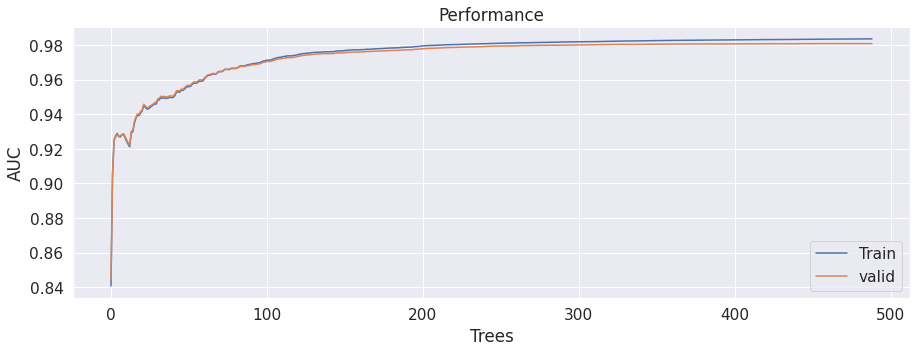

In [ ]:
eval_results = my_final_model.evals_result()
train_auc_tree = eval_results['validation_0']['auc']
valid_auc_tree = eval_results['validation_1']['auc']
plt.figure(figsize=(15,5))
plt.plot(train_auc_tree,label='Train')
plt.plot(valid_auc_tree,label='valid')
plt.title('Performance')
plt.xlabel('Trees')
plt.ylabel('AUC')
plt.legend(loc='lower right')
plt.show()

#ROC Scores

In [ ]:
from sklearn import model_selection
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2)))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy', random_state = 0)))
models.append(('XGBoost',xgboost.XGBClassifier(learning_rate=0.05,
                                       max_depth=2,
                                       n_estimators=5000,
                                       subsample=0.5,
                                       colsample_bytree=0.25,
                                       eval_metric='auc',
                                       verbosity=1,
                                       use_label_encoder=False)))
#Evaluating Model Results:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD',
       'Accuracy Mean', 'Accuracy STD']
roc_results = pd.DataFrame(columns=col)
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=0, shuffle=True)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(
    model, X_train, y_train, cv=kfold, scoring='accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(
    model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    roc_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

roc_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
2,Random Forest,98.15,0.13,94.37,0.45
3,XGBoost,98.05,0.16,94.12,0.30
1,Decision Tree Classifier,92.35,0.37,92.58,0.37
0,KNN,81.97,0.63,77.04,0.51


# Feature Important

In [ ]:
importances = classifier.feature_importances_

In [ ]:
sorted_indices = np.argsort(importances)[::-1]

feat_labels = ml_ready.columns[:-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) total_amount                   0.224679
 2) product_id                     0.149767
 3) event_id                       0.123606
 4) age                            0.089815
 5) cust_age_category              0.049200
 6) master_category                0.045544
 7) shipment_fee                   0.042443
 8) gender_product                 0.039037
 9) payment_status                 0.036374
10) item_price                     0.032937
11) churn                          0.026528
12) product_name_length            0.026465
13) promo_amount                   0.024591
14) quantity                       0.024246
15) season                         0.023026
16) device_type                    0.015462
17) estimated_days_arrival         0.007716
18) homelocation_category          0.006109
19) lengthjoin_months              0.003811
20) search_keywords_count          0.003185
21) gender                         0.002930
22) payment_method                 0.002530


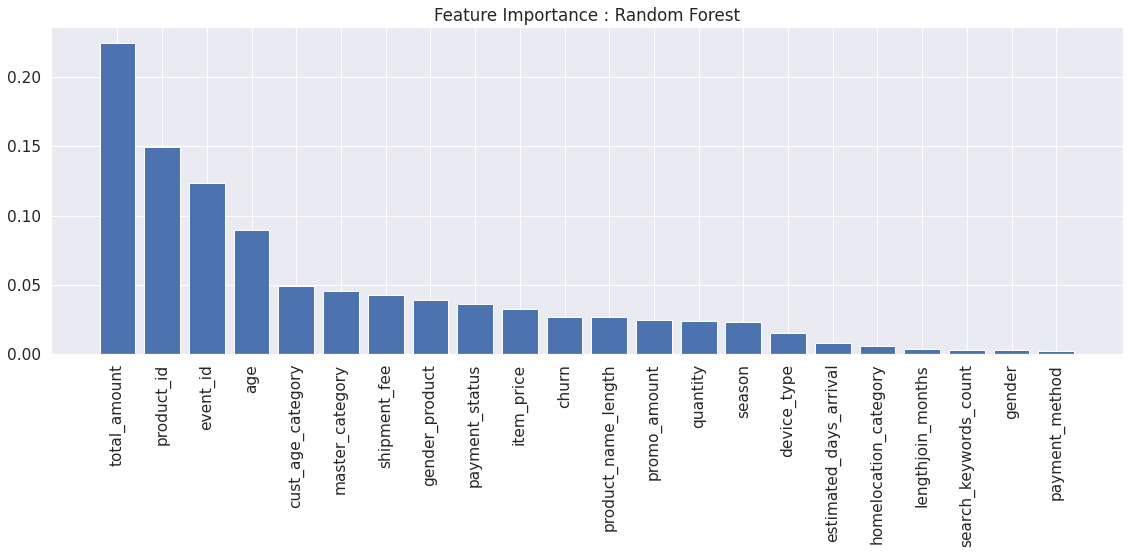

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Feature Importance : Random Forest')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), ml_ready.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
np.array(ml_ready.columns[sorted_indices])

array(['total_amount', 'product_id', 'event_id', 'age',
       'cust_age_category', 'master_category', 'shipment_fee',
       'gender_product', 'payment_status', 'item_price', 'churn',
       'product_name_length', 'promo_amount', 'quantity', 'season',
       'device_type', 'estimated_days_arrival', 'homelocation_category',
       'lengthjoin_months', 'search_keywords_count', 'gender',
       'payment_method'], dtype=object)

In [ ]:
importances[sorted_indices]

array([0.22467898, 0.14976732, 0.12360613, 0.08981477, 0.04919968,
       0.04554408, 0.04244271, 0.03903669, 0.03637391, 0.03293656,
       0.02652765, 0.02646483, 0.02459104, 0.02424588, 0.02302605,
       0.01546186, 0.00771631, 0.00610856, 0.00381073, 0.00318537,
       0.00293042, 0.00253048])

In [ ]:
feature_importances = pd.DataFrame({'feature': list(np.array(ml_ready.columns[sorted_indices])), 'importances': list(importances[sorted_indices])}, columns=['features', 'importances'])

In [ ]:
feature_importances.to_excel('/content/drive/My Drive/feature.xls',encoding='uft-8')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.
